In [1]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#prepare image for detection by the trained model.

label_names = ["Dog", "Cat", "Car"]
def process_image(file_path):
    IMG_SIZE = 70
    cv_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(cv_image, (IMG_SIZE, IMG_SIZE))
    plt.imshow(cv_image, cmap='gray')
    plt.show()
    return resized_image.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

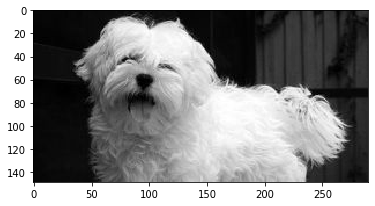

[[1. 0. 0.]]


In [16]:

#load the training model for detection
trained_model = tf.keras.models.load_model("image_classification_CNN.model")
image_to_predict = './test_images/dog2.jpg'
result = trained_model.predict([process_image(image_to_predict)])
print(result)

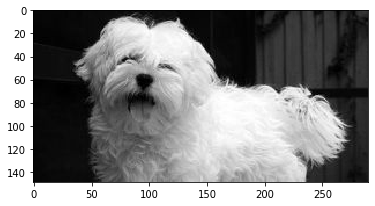

Dog


In [17]:
#display the predicted image
cv_image = cv2.imread(image_to_predict ,cv2.IMREAD_GRAYSCALE)
plt.imshow(cv_image, cmap='gray')
plt.show()

# Print the prediction
print(label_names[np.argmax(result)])